In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the train and test images
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


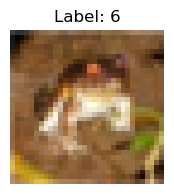

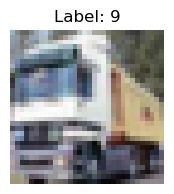

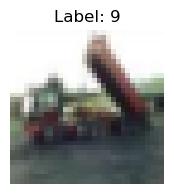

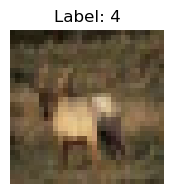

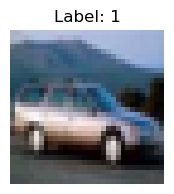

In [4]:
# Displaying first 5 images

for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
    plt.show()

In [5]:
# Print the labels and its corresponding number of images for train data
unique_values, counts = np.unique(y_train, return_counts=True)

for value, count in zip(unique_values, counts):
    print("Label:",  value, ", Count:", count)

Label: 0 , Count: 5000
Label: 1 , Count: 5000
Label: 2 , Count: 5000
Label: 3 , Count: 5000
Label: 4 , Count: 5000
Label: 5 , Count: 5000
Label: 6 , Count: 5000
Label: 7 , Count: 5000
Label: 8 , Count: 5000
Label: 9 , Count: 5000


In [6]:
# Normalize the image data to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

num_classes = len(np.unique(y_train))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [7]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


# CNN Scratch

In [29]:
# Build the CNN Scratch model
cnn_scratch = models.Sequential()

# First convolutional block
cnn_scratch.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_scratch.add(layers.UpSampling2D(size=(2, 2)))
cnn_scratch.add(layers.BatchNormalization())
cnn_scratch.add(layers.MaxPooling2D((2, 2)))

# Second convolutional block
cnn_scratch.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_scratch.add(layers.BatchNormalization())
cnn_scratch.add(layers.MaxPooling2D((2, 2)))

# Third convolutional block
cnn_scratch.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_scratch.add(layers.BatchNormalization())
cnn_scratch.add(layers.MaxPooling2D((2, 2)))
 
# Fourth convolutional block
cnn_scratch.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_scratch.add(layers.BatchNormalization())
cnn_scratch.add(layers.MaxPooling2D((2, 2)))


# Flatten the 3D outputs to 1D vector
cnn_scratch.add(layers.Flatten())

# Fully connected layer with L2 regularization
cnn_scratch.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
cnn_scratch.add(layers.Dropout(0.5))

# Output layer 
cnn_scratch.add(layers.Dense(10, activation='softmax'))

# Compile the model
cnn_scratch.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Model summary
cnn_scratch.summary()

/Users/saigouthamgoli/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,826 (1.99 MB)

 Trainable params: 521,866 (1.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [9]:
# Train the model
cnn_scratch_training_history = cnn_scratch.fit(x_train, y_train,
                                               epochs=50,
                                               batch_size=64,
                                               validation_split=0.3,
                                               shuffle=True)

Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 44s 77ms/step - accuracy: 0.2760 - loss: 2.5083 - precision: 0.3652 - recall: 0.1080 - val_accuracy: 0.4352 - val_loss: 1.7885 - val_precision: 0.6642 - val_recall: 0.1605
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.4545 - loss: 1.7531 - precision: 0.6398 - recall: 0.2443 - val_accuracy: 0.5476 - val_loss: 1.4811 - val_precision: 0.7411 - val_recall: 0.3467
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 40s 74ms/step - accuracy: 0.5298 - loss: 1.5471 - precision: 0.7053 - recall: 0.3466 - val_accuracy: 0.5939 - val_loss: 1.3693 - val_precision: 0.7634 - val_recall: 0.4170
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.5805 - loss: 1.4085 - precision: 0.7433 - recall: 0.4132 - val_accuracy: 0.6187 - val_loss: 1.2738 - val_precision: 0.7762 - val_recall: 0.4769
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 40s 74ms/step - accuracy: 0.6163 - loss: 1.2955 - precision: 0.7613 - recall: 0.4641 - val_accuracy: 0.6431 - va

In [10]:
# Evaluate the model on test set
test_loss, test_accuracy, test_precision, test_recall = cnn_scratch.evaluate(x_test, y_test)

print("Test Loss:", round(test_loss, 3))
print("Test Accuracy:", round(test_accuracy, 3))
print("Test Precision:", round(test_precision, 3))
print("Test Recall:", round(test_recall, 3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7048 - loss: 1.5509 - precision: 0.7221 - recall: 0.6949
Test Loss: 1.586
Test Accuracy: 0.701
Test Precision: 0.716
Test Recall: 0.691


In [11]:
# Creating new dataframe to store the results
results_df = pd.DataFrame(columns=[
        "Model",
        "Test Loss", 
        "Test Accuracy", 
        "Test Precision", 
        "Test Recall"
    ])

In [12]:
results_df.loc[len(results_df)] = ["CNN from Scratch",
                                    test_loss,
                                    test_accuracy,
                                    test_precision,
                                    test_recall]

In [13]:
print(results_df)

              Model  Test Loss  Test Accuracy  Test Precision  Test Recall
0  CNN from Scratch   1.586334         0.7013        0.715899       0.6912


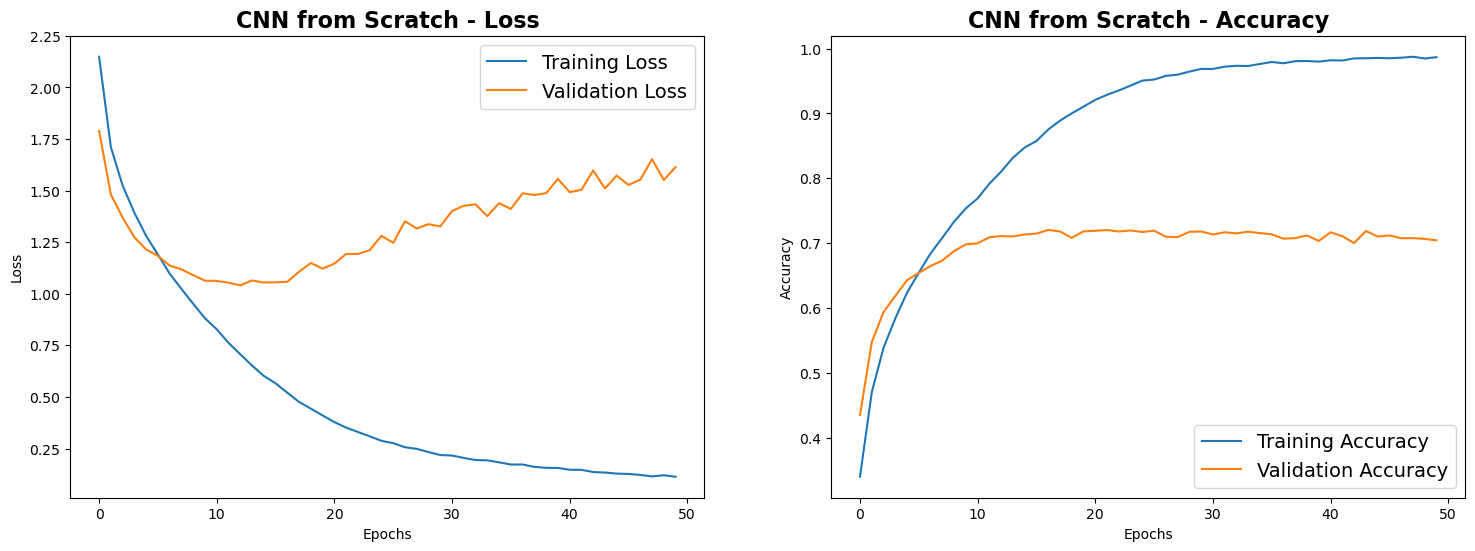

In [14]:
plt.figure(figsize = (18, 6))

# Plot training and validation loss for CNN Scratch Model
plt.subplot(121)
plt.plot(cnn_scratch_training_history.history['loss'])
plt.plot(cnn_scratch_training_history.history['val_loss'])
plt.title('CNN from Scratch - Loss', fontsize = 16, fontweight="bold")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right', fontsize=14)

# Plot training and validation accuracy for CNN Scratch Model
plt.subplot(122)
plt.plot(cnn_scratch_training_history.history['accuracy'])
plt.plot(cnn_scratch_training_history.history['val_accuracy'])
plt.title('CNN from Scratch - Accuracy', fontsize = 16, fontweight="bold")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right', fontsize=14)

# ResNet50 Scratch

In [15]:
num_classes = 10

# Load ResNet50 architecture without pre-trained weights
resnet50_scratch_base = ResNet50(weights=None, include_top=False, input_shape=(64, 64, 3))

# Build the ResNet50 Scratch model
resnet50_scratch = models.Sequential()

# Input layer and upsampling layer to match ResNet50 input shape
resnet50_scratch.add(layers.InputLayer(input_shape=(32, 32, 3)))
resnet50_scratch.add(layers.UpSampling2D(size=(2, 2)))

# ResNet50 base model without pre-trained weights
resnet50_scratch.add(resnet50_scratch_base)

# Global average pooling layer
resnet50_scratch.add(layers.GlobalAveragePooling2D())

# Fully connected layers with L2 regularization
resnet50_scratch.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
resnet50_scratch.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Output layer 
resnet50_scratch.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
resnet50_scratch.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                         loss='categorical_crossentropy',
                         metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Model Summary
resnet50_scratch.summary()

/Users/saigouthamgoli/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d_1 (UpSampling2D)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,146,442 (92.11 MB)

 Trainable params: 24,093,322 (91.91 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [16]:
# Train the model
resnet50_scratch_history = resnet50_scratch.fit(x_train, y_train,
                                                epochs=50,
                                                batch_size=64,
                                                validation_split=0.3,
                                                shuffle=True)

Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 345s 611ms/step - accuracy: 0.2294 - loss: 7.2981 - precision_1: 0.4155 - recall_1: 0.0215 - val_accuracy: 0.2068 - val_loss: 5.3236 - val_precision_1: 0.4189 - val_recall_1: 0.0535
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 333s 609ms/step - accuracy: 0.4072 - loss: 4.1143 - precision_1: 0.6062 - recall_1: 0.1840 - val_accuracy: 0.4111 - val_loss: 3.1670 - val_precision_1: 0.5708 - val_recall_1: 0.2266
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 344s 628ms/step - accuracy: 0.4868 - loss: 2.7507 - precision_1: 0.6630 - recall_1: 0.2894 - val_accuracy: 0.4493 - val_loss: 2.4019 - val_precision_1: 0.5788 - val_recall_1: 0.3118
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 342s 625ms/step - accuracy: 0.5614 - loss: 2.0258 - precision_1: 0.7091 - recall_1: 0.3950 - val_accuracy: 0.4619 - val_loss: 2.1417 - val_precision_1: 0.5819 - val_recall_1: 0.3531
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 339s 619ms/step - accuracy: 0.6147 - loss: 1.5890 - precision_1: 0.7457 

In [17]:
# Evaluate the model on test set
test_loss, test_accuracy, test_precision, test_recall = resnet50_scratch.evaluate(x_test, y_test)

print("Test Loss:", round(test_loss, 3))
print("Test Accuracy:", round(test_accuracy, 3))
print("Test Precision:", round(test_precision, 3))
print("Test Recall:", round(test_recall, 3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.6662 - loss: 1.5465 - precision_1: 0.6816 - recall_1: 0.6575
Test Loss: 1.556
Test Accuracy: 0.663
Test Precision: 0.679
Test Recall: 0.654


In [18]:
results_df.loc[len(results_df)] = ["ResNet50 from Scratch",
                                    test_loss,
                                    test_accuracy,
                                    test_precision,
                                    test_recall]

In [19]:
print(results_df)

                   Model  Test Loss  Test Accuracy  Test Precision  \
0       CNN from Scratch   1.586334         0.7013        0.715899   
1  ResNet50 from Scratch   1.555929         0.6632        0.679202   

   Test Recall  
0       0.6912  
1       0.6538  


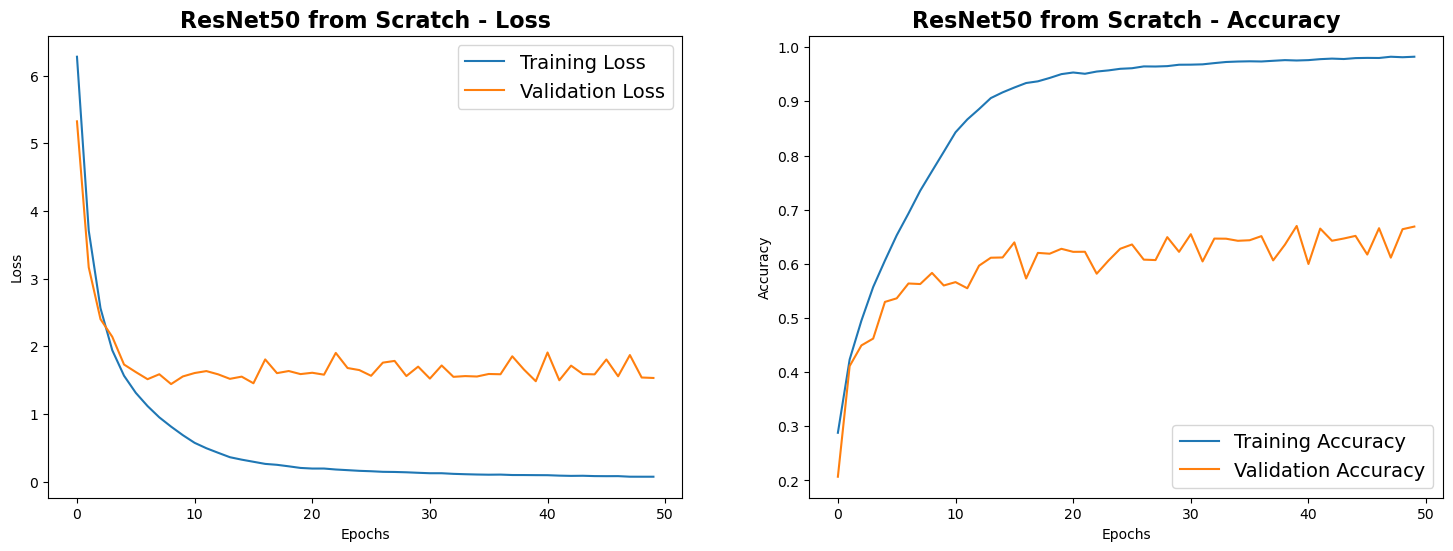

In [20]:
plt.figure(figsize = (18, 6))

# Plot training and validation loss for ResNet50 Scratch Model
plt.subplot(121)
plt.plot(resnet50_scratch_history.history['loss'])
plt.plot(resnet50_scratch_history.history['val_loss'])
plt.title('ResNet50 from Scratch - Loss', fontsize = 16, fontweight="bold")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right', fontsize=14)

# Plot training and validation accuracy for ResNet50 Scratch Model
plt.subplot(122)
plt.plot(resnet50_scratch_history.history['accuracy'])
plt.plot(resnet50_scratch_history.history['val_accuracy'])
plt.title('ResNet50 from Scratch - Accuracy', fontsize = 16, fontweight="bold")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right', fontsize=14)

# ResNet50 Transfer Learning

In [21]:
num_classes = 10

# Load ResNet50 architecture with 'imagenet' weights
resnet50_transfer_base = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Build the ResNet50 Transfer Learning Model
resnet50_transfer_learning = models.Sequential()

# Input layer and upsampling layer to match ResNet50 input shape
resnet50_transfer_learning.add(layers.InputLayer(input_shape=(32, 32, 3)))
resnet50_transfer_learning.add(layers.UpSampling2D(size=(2, 2)))

# ResNet50 base model with pre-trained weights
resnet50_transfer_learning.add(resnet50_transfer_base)

# Global average pooling layer
resnet50_transfer_learning.add(layers.GlobalAveragePooling2D())

# Fully connected layers with L2 regularization
resnet50_transfer_learning.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
resnet50_transfer_learning.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Output layer 
resnet50_transfer_learning.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
resnet50_transfer_learning.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
# Print the model summary
resnet50_transfer_learning.summary()

/Users/saigouthamgoli/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,146,442 (92.11 MB)

 Trainable params: 24,093,322 (91.91 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [22]:
# Train the model
resnet50_transfer_learning_history = resnet50_transfer_learning.fit(x_train, y_train,
                                                                    epochs=50,
                                                                    batch_size=64,
                                                                    validation_split=0.3,
                                                                    shuffle=True)


Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 357s 632ms/step - accuracy: 0.6061 - loss: 6.7950 - precision_2: 0.7728 - recall_2: 0.4677 - val_accuracy: 0.1449 - val_loss: 6.3962 - val_precision_2: 0.2578 - val_recall_2: 0.0182
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 352s 643ms/step - accuracy: 0.9177 - loss: 3.5155 - precision_2: 0.9365 - recall_2: 0.8965 - val_accuracy: 0.8202 - val_loss: 2.5473 - val_precision_2: 0.8510 - val_recall_2: 0.7963
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 365s 667ms/step - accuracy: 0.9607 - loss: 1.8321 - precision_2: 0.9689 - recall_2: 0.9528 - val_accuracy: 0.8579 - val_loss: 1.5043 - val_precision_2: 0.8766 - val_recall_2: 0.8449
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 363s 663ms/step - accuracy: 0.9754 - loss: 0.9703 - precision_2: 0.9804 - recall_2: 0.9712 - val_accuracy: 0.8689 - val_loss: 1.0019 - val_precision_2: 0.8841 - val_recall_2: 0.8593
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 335s 613ms/step - accuracy: 0.9782 - loss: 0.5545 - precision_2: 0.9812 

In [23]:
# Evaluate the model on test set
test_loss, test_accuracy, test_precision, test_recall = resnet50_transfer_learning.evaluate(x_test, y_test)

print("Test Loss:", round(test_loss, 3))
print("Test Accuracy:", round(test_accuracy, 3))
print("Test Precision:", round(test_precision, 3))
print("Test Recall:", round(test_recall, 3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.8774 - loss: 0.5320 - precision_2: 0.8851 - recall_2: 0.8727
Test Loss: 0.522
Test Accuracy: 0.88
Test Precision: 0.889
Test Recall: 0.874


In [24]:
results_df.loc[len(results_df)] = ["ResNet50 Transfer Learning",
                                    test_loss,
                                    test_accuracy,
                                    test_precision,
                                    test_recall]

In [25]:
print(results_df)

                        Model  Test Loss  Test Accuracy  Test Precision  \
0            CNN from Scratch   1.586334         0.7013        0.715899   
1       ResNet50 from Scratch   1.555929         0.6632        0.679202   
2  ResNet50 Transfer Learning   0.522327         0.8800        0.888810   

   Test Recall  
0       0.6912  
1       0.6538  
2       0.8745  


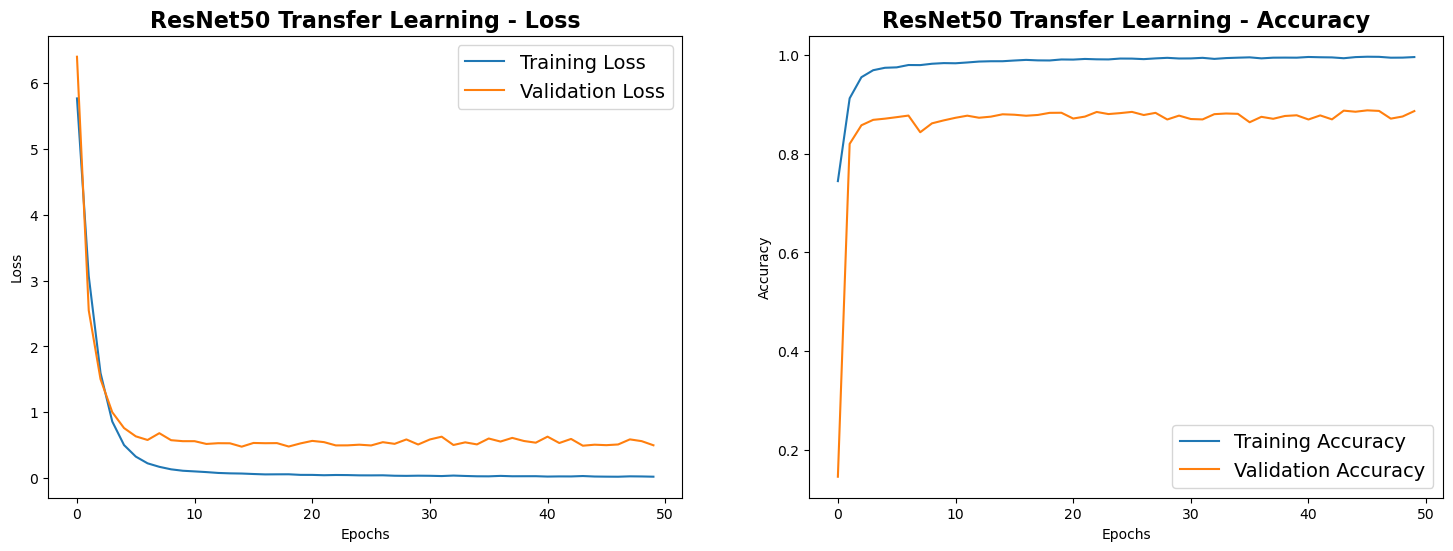

In [26]:
plt.figure(figsize = (18, 6))
# Plot training and validation loss for ResNet50 Transfer Learning Model
plt.subplot(121)
plt.plot(resnet50_transfer_learning_history.history['loss'])
plt.plot(resnet50_transfer_learning_history.history['val_loss'])
plt.title('ResNet50 Transfer Learning - Loss', fontsize = 16, fontweight="bold")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right', fontsize=14)

# Plot training and validation accuracy for ResNet50 Transfer Learning Model
plt.subplot(122)
plt.plot(resnet50_transfer_learning_history.history['accuracy'])
plt.plot(resnet50_transfer_learning_history.history['val_accuracy'])
plt.title('ResNet50 Transfer Learning - Accuracy', fontsize = 16, fontweight="bold")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right', fontsize=14)

In [27]:
print(results_df)

                        Model  Test Loss  Test Accuracy  Test Precision  \
0            CNN from Scratch   1.586334         0.7013        0.715899   
1       ResNet50 from Scratch   1.555929         0.6632        0.679202   
2  ResNet50 Transfer Learning   0.522327         0.8800        0.888810   

   Test Recall  
0       0.6912  
1       0.6538  
2       0.8745  


In [28]:
results_df

,Model,Test Loss,Test Accuracy,Test Precision,Test Recall
0,CNN from Scratch,1.586334,0.7013,0.715899,0.6912
1,ResNet50 from Scratch,1.555929,0.6632,0.679202,0.6538
2,ResNet50 Transfer Learning,0.522327,0.8800,0.888810,0.8745
